In [1]:
#Necessary packages
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from math import sqrt
import datetime 
import calendar
import sys
import matplotlib.pyplot as plt

In [2]:
# Load data
file_path = r'C:\Users\PHIRI003\OneDrive - Wageningen University & Research\Documents\WEcR Internship\Work\Eggs\Eggs.xlsx'
df = pd.read_excel(file_path, header=0)

# Ensure a datetime index
date_range = pd.date_range(start='2010-01-01', periods=len(df), freq='M')
df.index = df['Date']


In [1]:
#print(df.head(5))

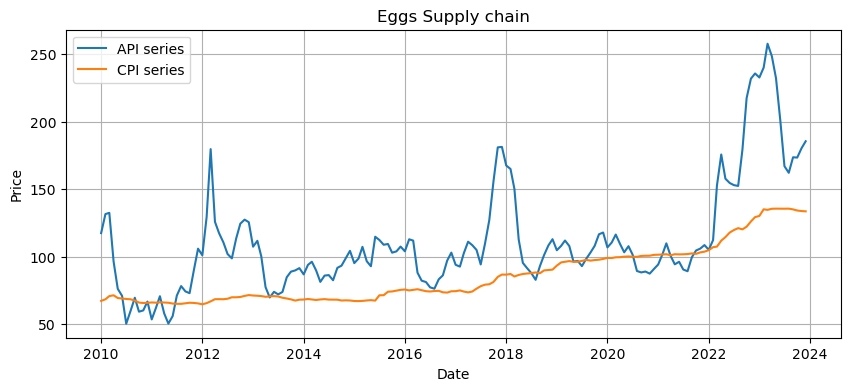

In [3]:
#Plotting the price series
x = df['Date']
y2 = ['API', 'CPI']

plt.figure(figsize = (10,4))
for column in y2:
    plt.plot(x, df[column], label=f'{column} series')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Eggs Supply chain')
plt.grid(True)
plt.legend()
plt.savefig('Eggs Prices.png')
# Show the plot
plt.show()

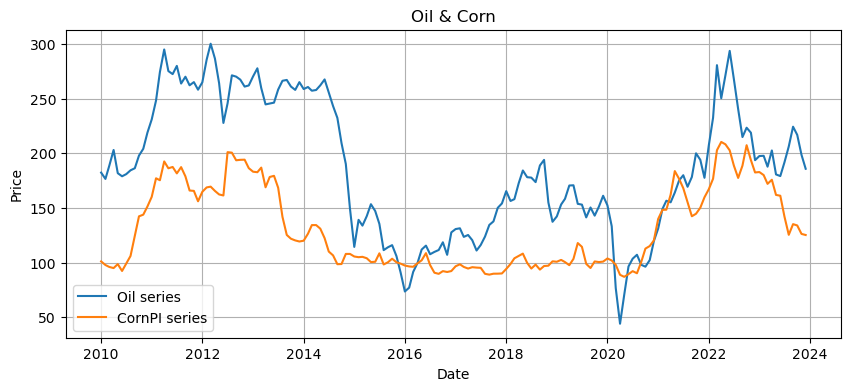

In [3]:
#Plotting the price series
x = df['Date']
y2 = ['Oil', 'CornPI']

plt.figure(figsize = (10,4))
for column in y2:
    plt.plot(x, df[column], label=f'{column} series')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Oil & Corn')
plt.grid(True)
plt.legend()
plt.savefig('Oil-Prices.png')
# Show the plot
plt.show()

In [4]:
#ADF test
from statsmodels.tsa.stattools import adfuller

columns_to_test = ['API', 'CPI', 'Oil', 'CornPI']

for column in columns_to_test:
    adf_test = adfuller(df[column])
    
    print(f'{column} ADF test:')
    print('ADF Statistic:', adf_test[0])
    print('P-value:', adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print(f'   {key}: {value}')
    print('\n')
    

API ADF test:
ADF Statistic: -2.875214681149587
P-value: 0.0483070407885266
Critical Values:
   1%: -3.4732590518613002
   5%: -2.880374082105334
   10%: -2.5768120811654525


CPI ADF test:
ADF Statistic: 1.460901239116154
P-value: 0.9973739829160512
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045


Oil ADF test:
ADF Statistic: -1.8194274649220092
P-value: 0.3708600407149536
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045


CornPI ADF test:
ADF Statistic: -2.0797092006011795
P-value: 0.252751512613692
Critical Values:
   1%: -3.4703698981001665
   5%: -2.8791138497902193
   10%: -2.576139407751488




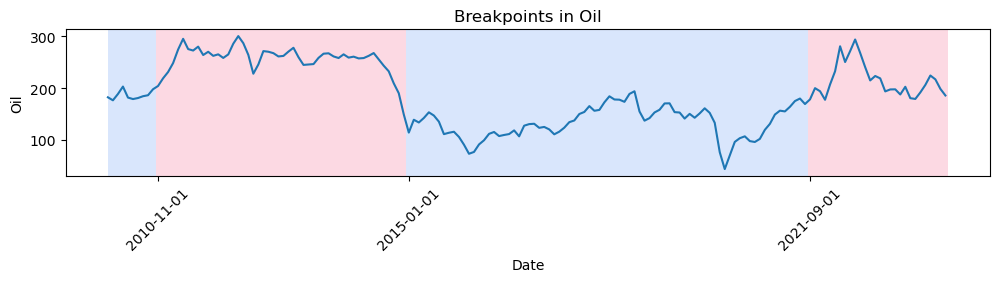

Breakpoints in Oil: [Timestamp('2010-11-01 00:00:00'), Timestamp('2015-01-01 00:00:00'), Timestamp('2021-09-01 00:00:00')]


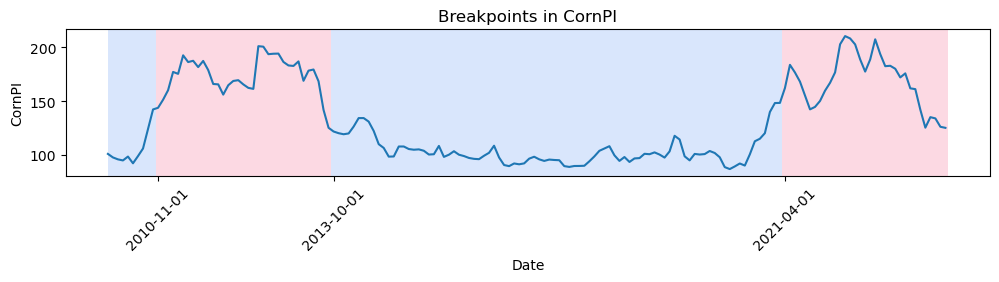

Breakpoints in CornPI: [Timestamp('2010-11-01 00:00:00'), Timestamp('2013-10-01 00:00:00'), Timestamp('2021-04-01 00:00:00')]


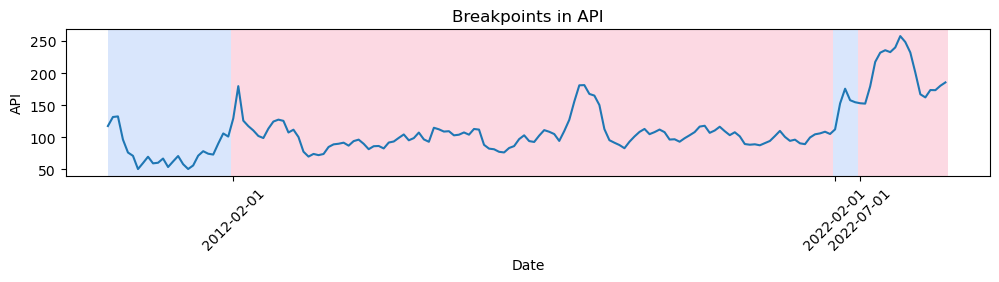

Breakpoints in API: [Timestamp('2012-02-01 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-07-01 00:00:00')]


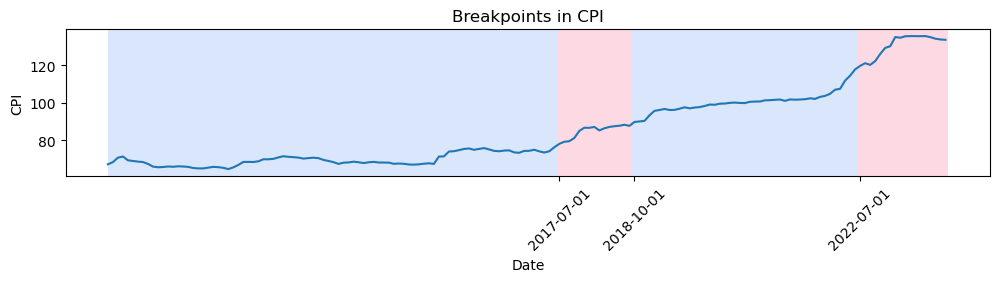

Breakpoints in CPI: [Timestamp('2017-07-01 00:00:00'), Timestamp('2018-10-01 00:00:00'), Timestamp('2022-07-01 00:00:00')]


In [5]:
import pandas as pd
import ruptures as rpt

for column in ['Oil', 'CornPI', 'API', 'CPI']:
    ts = df[column].dropna()
    adjusted_index = ts.index
    ts_values = ts.values.reshape(-1, 1)
    
    # Apply the Bai-Perron test
    model = "l2"  # least squares
    algo = rpt.Binseg(model=model).fit(ts_values)
    
    # You can specify the number of break points or use a penalty approach
   
    n_bkps = 3 
    result = algo.predict(n_bkps=n_bkps)
    
    # Convert breakpoint indices to dates
    break_dates = [adjusted_index[i] for i in result if i < len(adjusted_index)]

    
    # Plot the results with breakpoints as dates
    rpt.display(ts_values, result)
    plt.title(f'Breakpoints in {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(ticks=result[:-1], labels=[adjusted_index[i].strftime('%Y-%m-%d') for i in result[:-1] if i < len(adjusted_index)], rotation=45)
    plt.savefig(f'{column}_breakpoints.png', bbox_inches='tight')
    plt.show()

    

# Print breakpoints as dates
    print(f'Breakpoints in {column}: {break_dates}')